In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV

from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor



import warnings
warnings.filterwarnings("ignore")


from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
df_train = pd.read_csv('/content/train.csv', index_col='Id')
df_test = pd.read_csv('/content/test.csv', index_col='Id')
sample_submission = pd.read_csv('/content/sample_submission.csv')
df = pd.concat([df_train, df_test], axis=0)

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,5.319106
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,5.258877
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,5.349278
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,5.146128
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

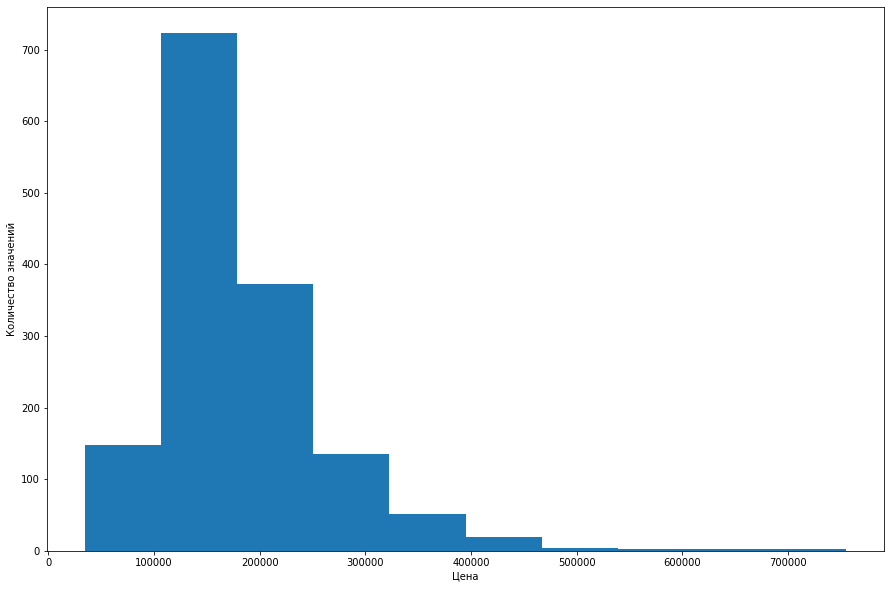

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Цена")
plt.ylabel("Количество значений")
plt.hist(df["SalePrice"])

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([4.54282543, 4.67633758, 4.80984973, 4.94336188, 5.07687404,
        5.21038619, 5.34389834, 5.47741049, 5.61092265, 5.7444348 ,
        5.87794695]),
 <a list of 10 Patch objects>)

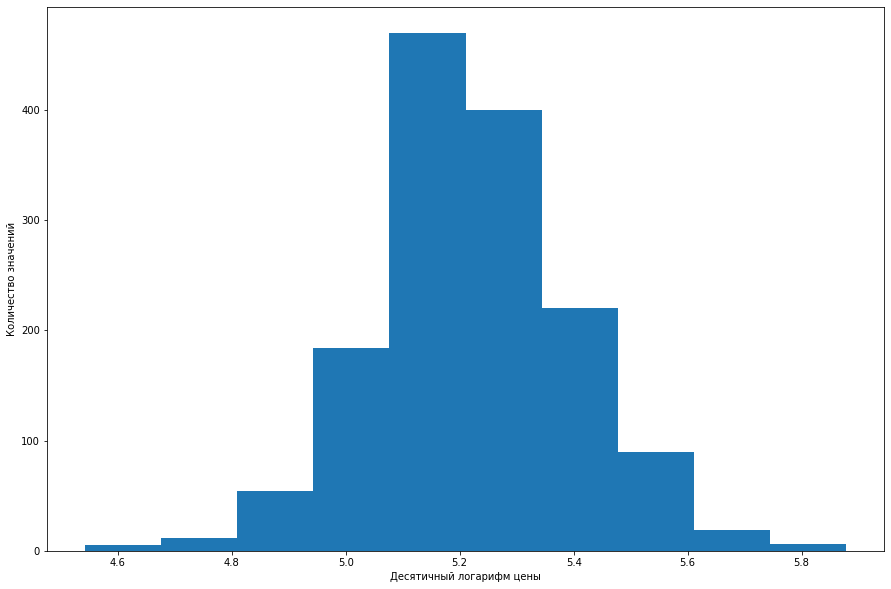

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Десятичный логарифм цены")
plt.ylabel("Количество значений")
plt.hist(np.log10(df["SalePrice"]))

В датасете 43 категориальные колонки. При этом некоторые из них можно проранжировать, поскольку значения в них являются сравнительными (плохое => хорошее)

In [ ]:
range_cat = ['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond' ]

In [ ]:
null_values = df.isna().sum()

Рассмотрим количество нулевых значений в различных типах данных. Сначала числовые колонки.

In [ ]:
df.select_dtypes(include=['int64','float64']).isna().sum()/df.shape[0]*100

MSSubClass        0.000000
LotFrontage      16.649538
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.787941
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.447071
GarageCars        0.034258
GarageArea        0.034258
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice        49.982871
d

Для простоты заменим пустые значения для категорий с малым количеством пропуском средними значнеиями.

In [ ]:
low_null = ['GarageArea', 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea']

In [ ]:
for i in low_null:
  df[i].fillna(df[i].mean(), inplace=True)

In [ ]:
df.select_dtypes(include=['int64','float64']).isna().sum()/df.shape[0]*100

MSSubClass        0.000000
LotFrontage      16.649538
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.447071
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice        49.982871
dtype: float64

В колонке GarageYrBlt достаточно много пустых значений, но поскольку эта категория является датой постройки гаража, можно предположить, что в большинстве случаев она будет совпадать с датой постройки дома. Поэтому заполним пустые значения исходя из года постройки дома.

In [ ]:
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

In [ ]:
df.select_dtypes(include=['int64','float64']).isna().sum()/df.shape[0]*100

MSSubClass        0.000000
LotFrontage      16.649538
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice        49.982871
dtype: float64

Осталась одна колонка LotFrontage, содержащая 16% пустых значений. Можно заменить средним, но я предпочту другой вариант. Поскольку она означает площадь примыкающей к дому территории, мы можем предположить, что это есть функция от площади дома. Поэтому используем линейную регрессию для определения коэффицентов и домножим на площадь дома.

In [ ]:
lm = LinearRegression()
lm_X = df[df['LotFrontage'].notnull()]['LotArea'].values.reshape(-1,1)
lm_y = df[df['LotFrontage'].notnull()]['LotFrontage'].values
lm.fit(lm_X,lm_y)
df['LotFrontage'].fillna((df['LotArea'] * lm.coef_[0] + lm.intercept_), inplace=True)


In [ ]:
df.select_dtypes(include=['int64','float64']).isna().sum()/df.shape[0]*100

MSSubClass        0.000000
LotFrontage       0.000000
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice        49.982871
dtype: float64

Теперь посмотрим на пустые значения в категориальных колонках.

In [ ]:
df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100

MSZoning          0.137033
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.000000
BsmtFinType2      2.740665
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.034258
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
K

Заполнять колонки с более чем 50% пустых значений смысла не имеет. Особенно если эти колонки не являются принципильно важными, поэтому их лучше отбросить.

In [ ]:
df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'], axis=1, inplace=True)

In [ ]:
df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100

MSZoning         0.137033
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.068517
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.000000
BsmtFinType2     2.740665
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.034258
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
KitchenQual      0.034258
Functional       0.068517
GarageType  

In [ ]:
df[range_cat].isna().sum()/df.shape[0]*100

ExterQual       0.0
ExterCond       0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
HeatingQC       0.0
KitchenQual     0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

Заменим nan на отсутствющее значение ('none')

In [ ]:
for i in range_cat:
  df[i].fillna('None', inplace=True)

In [ ]:
df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100

MSZoning         0.137033
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.068517
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.034258
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
KitchenQual      0.000000
Functional       0.068517
GarageType  

In [ ]:
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)

Оставшиеся пустые значениями заполняем модой.

In [ ]:
obj_col = df.select_dtypes(include=['object']).columns

In [ ]:
obj_col[0]

'MSZoning'

In [ ]:
for i in obj_col:
  df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
df['MSZoning'].mode().values

array(['RL'], dtype=object)

In [ ]:
df['MSZoning'].fillna(df['MSZoning'].mode(), inplace=True)

In [ ]:
df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [ ]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

С пустыми значениями разобрались, теперь надо перейти к кодированию категориальных данных. Начнем с ранжируемых значений.

In [ ]:
cate1 = ["BsmtCond"]
cate1_item = ['None',"Po", "Fa", "TA", "Gd"]

cate2 = ["BsmtExposure"]
cate2_item = ['None','No','Mn','Av','Gd']

cate3 = ["BsmtQual"]
cate3_item = ['None',"Fa","TA","Gd", "Ex"]

cate4 = ["ExterCond", "HeatingQC"]
cate4_item = ["Po", "Fa", "TA", "Gd", "Ex"]

cate5 = ["ExterQual", "KitchenQual"]
cate5_item = ["None","Fa", "TA", "Gd", "Ex"]

cate6 = ["GarageQual", "GarageCond"]
cate6_item = ['None',"Po", "Fa", "TA", "Gd", "Ex"]

cate7 = ["BsmtFinType1", "BsmtFinType2"]
cate7_item = ['None',"Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]

cate = [cate1,cate2,cate3,cate4,cate5,cate6,cate7]
cate_item = [cate1_item,cate2_item,cate3_item,cate4_item,cate5_item,cate6_item,cate7_item]

In [ ]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa', 'None'], dtype=object)

Используем ordinalencoder

In [ ]:
for idx in range(len(cate)):
    encoder = OrdinalEncoder(categories = [cate_item[idx]])
    
    for col in cate[idx]:
        df[col] = encoder.fit_transform(df[[col]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

Перейдем к кодированию оставшихся категориальных переменных.

In [ ]:
cate_feat = list(df.select_dtypes(include = [object]))

In [ ]:
cate_feat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
for i in cate_feat:
  print(len(df[i].unique()))

5
2
4
4
2
5
3
25
9
8
5
8
6
8
15
16
4
6
6
2
5
7
7
4
3
9
6


Для колонок с уникальным значением меньше 6 применим горячее кодирование.

In [ ]:
cate_one_hot = list()
cate_target_var = list()

for col in df[cate_feat].columns:
    if len(df[col].unique()) <6:
        cate_one_hot.append(col)
    else:
        cate_target_var.append(col)

In [ ]:
cate_one_hot

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'CentralAir',
 'Electrical',
 'GarageFinish',
 'PavedDrive']

In [ ]:
dummies_one_hot = pd.get_dummies(df[cate_one_hot], drop_first = True)
dummies_one_hot

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
5,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2916,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
2917,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1


Для остальных

In [ ]:
def one_hot(df):
    
    for col in df:
        top_10 = [item for item in df[col].value_counts().sort_values(ascending = False).head(6).index]
        
        for label in top_10:
            df[label] = np.where(df[col]==label,1,0)
            
    return df

In [ ]:
df_tar_var = one_hot(df[cate_target_var])
df_tar_var.drop(cate_target_var,axis = 1,inplace = True)

объединяем

In [ ]:
df_final = pd.concat([df_tar_var,dummies_one_hot,df],axis = 1)
df_final.drop(cate_feat,axis = 1, inplace = True)

In [ ]:
df_final

,NAmes,CollgCr,OldTown,Edwards,Somerst,NridgHt,Norm,Feedr,Artery,RRAn,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,...,0,61,0,0,0,0,0,2,2008,208500.0
2,0,0,0,0,0,0,1,0,0,0,...,298,0,0,0,0,0,0,5,2007,181500.0
3,0,1,0,0,0,0,1,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500.0
4,0,0,0,0,0,0,1,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000.0
5,0,0,0,0,0,0,1,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,6,2006,NaN
2916,0,0,0,0,0,0,1,0,0,0,...,0,24,0,0,0,0,0,4,2006,NaN
2917,0,0,0,0,0,0,1,0,0,0,...,474,0,0,0,0,0,0,9,2006,NaN


In [ ]:
df_final_train = df_final[df_final['SalePrice'].notna()]
df_final_test = df_final[df_final['SalePrice'].isna()]

In [ ]:
df_final_train['SalePrice'] = df_final_train['SalePrice'].apply(lambda x: np.log10(x))

Сплитим тренировочный датасет на трейн и тест выборки

In [ ]:
X = df_final_train.drop(['SalePrice'], axis=1)
y = df_final_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Проводим кросс-валидацию для выбора классификатора

In [ ]:

pipe = Pipeline([('classifier', LogisticRegression())])


param_grid = [
    {'classifier' : [LogisticRegression()]
    },
    {'classifier' : [RandomForestRegressor()]
    },
    {'classifier' : [linear_model.LassoLars()]
    },
    {'classifier' : [GaussianNB()]
    },
    {'classifier' : [GradientBoostingRegressor()]
    }
    
]



clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='neg_root_mean_squared_error')



best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
best_clf.best_estimator_

Pipeline(steps=[('classifier', GradientBoostingRegressor())])

In [ ]:
best_clf.best_score_

-32375.646330225147

Как результат, видно что лучшим регрессором выступает GradientBoostingRegressor.

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False) 

23863.59567378964

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
gbr = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

In [ ]:
gbr = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search ")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1500,
                          subsample=0.9)

 The best score across ALL searched params:
 0.867208150963215

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.9}


In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1500, subsample=0.9)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False) 

0.05929703864327706

In [ ]:
gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1500, subsample=0.9)
gbr.fit(X, y)
y_pred = gbr.predict(df_final_test.drop(['SalePrice'], axis=1))

In [ ]:
y_pred

array([5.08385775, 5.20603494, 5.27770859, ..., 5.21355962, 5.05704312,
       5.33329719])

In [ ]:
sub = []
for i in y_pred:
  sub.append(10**i)

In [ ]:

sample_submission['SalePrice']=sub
sample_submission.to_csv('newsub2.csv', index=False)

In [ ]:
sample_submission

,Id,SalePrice
0,1461,128313.952080
1,1462,162392.610982
2,1463,189422.730666
3,1464,193770.766491
4,1465,180115.302546
...,...,...
1454,2915,75921.622087
1455,2916,81155.985180
1456,2917,152181.238395
1457,2918,112151.844329


#Конец базовой модели

In [ ]:
df_train = pd.read_csv('/content/train.csv', index_col='Id')
df_test = pd.read_csv('/content/test.csv', index_col='Id')
sample_submission = pd.read_csv('/content/sample_submission.csv')
df = pd.concat([df_train, df_test], axis=0)

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [ ]:
df['SalePrice'] = df['SalePrice'].apply(lambda x: np.log10(x))

Избавляемся от нулей.

In [ ]:
range_cat = ['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond' ]
low_null = ['GarageArea', 'GarageCars', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MasVnrArea']
for i in low_null:
  df[i].fillna(df[i].mean(), inplace=True)
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

lm = LinearRegression()
lm_X = df[df['LotFrontage'].notnull()]['LotArea'].values.reshape(-1,1)
lm_y = df[df['LotFrontage'].notnull()]['LotFrontage'].values
lm.fit(lm_X,lm_y)
df['LotFrontage'].fillna((df['LotArea'] * lm.coef_[0] + lm.intercept_), inplace=True)

df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'], axis=1, inplace=True)

for i in range_cat:
  df[i].fillna('None', inplace=True)

df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)

obj_col = df.select_dtypes(include=['object']).columns

for i in obj_col:
  df[i].fillna(df[i].mode()[0], inplace=True)

cate1 = ["BsmtCond"]
cate1_item = ['None',"Po", "Fa", "TA", "Gd"]

cate2 = ["BsmtExposure"]
cate2_item = ['None','No','Mn','Av','Gd']

cate3 = ["BsmtQual"]
cate3_item = ['None',"Fa","TA","Gd", "Ex"]

cate4 = ["ExterCond", "HeatingQC"]
cate4_item = ["Po", "Fa", "TA", "Gd", "Ex"]

cate5 = ["ExterQual", "KitchenQual"]
cate5_item = ["None","Fa", "TA", "Gd", "Ex"]

cate6 = ["GarageQual", "GarageCond"]
cate6_item = ['None',"Po", "Fa", "TA", "Gd", "Ex"]

cate7 = ["BsmtFinType1", "BsmtFinType2"]
cate7_item = ['None',"Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]

cate = [cate1,cate2,cate3,cate4,cate5,cate6,cate7]
cate_item = [cate1_item,cate2_item,cate3_item,cate4_item,cate5_item,cate6_item,cate7_item]

for idx in range(len(cate)):
    encoder = OrdinalEncoder(categories = [cate_item[idx]])
    
    for col in cate[idx]:
        df[col] = encoder.fit_transform(df[[col]])

In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,5.319106
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,5.258877
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,5.349278
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,5.146128
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


Сплитим по типам объектов

In [ ]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
df_RL = df[df['MSZoning']=='RL']
df_RM = df[df['MSZoning']=='RM']
df_C = df[df['MSZoning']=='C (all)']
df_FV = df[df['MSZoning']=='FV']
df_RH = df[df['MSZoning']=='RH']

In [ ]:
df_RL.drop(['MSZoning'], axis=1, inplace=True)
df_RM.drop(['MSZoning'], axis=1, inplace=True)
df_C.drop(['MSZoning'], axis=1, inplace=True)
df_FV.drop(['MSZoning'], axis=1, inplace=True)
df_RH.drop(['MSZoning'], axis=1, inplace=True)

In [ ]:
df_RL

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,5.319106
2,20,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,5.258877
3,60,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,5.349278
4,70,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,5.146128
5,60,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,90,73.060747,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,...,0,0,0,0,0,3,2006,WD,Normal,NaN
2912,20,80.000000,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,5,2006,WD,Normal,NaN
2917,20,160.000000,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN


Работает с категориальными данными.

In [ ]:
def encoding(x):
  dummies_one_hot = pd.get_dummies(x[cate_one_hot], drop_first = True)


  df_tar_var = one_hot(x[cate_target_var])
  df_tar_var.drop(cate_target_var,axis = 1,inplace = True)

  df_tar_var = one_hot(x[cate_target_var])
  df_tar_var.drop(cate_target_var,axis = 1,inplace = True)

  df_final = pd.concat([df_tar_var,dummies_one_hot,x],axis = 1)
  df_final.drop(cate_feat,axis = 1, inplace = True)

  return df_final

def one_hot(df):
    
    for col in df:
        top_10 = [item for item in df[col].value_counts().sort_values(ascending = False).head(6).index]
        
        for label in top_10:
            df[label] = np.where(df[col]==label,1,0)
            
    return df

In [ ]:
cate_one_hot = list()
cate_target_var = list()
cate_feat = list(df_RL.select_dtypes(include = [object]))
for col in df_RL[cate_feat].columns:
    if len(df_RL[col].unique()) <6:
        cate_one_hot.append(col)
    else:
        cate_target_var.append(col)

df_RL = encoding(df_RL)
df_RM = encoding(df_RM)
df_C = encoding(df_C)
df_FV = encoding(df_FV)
df_RH = encoding(df_RH)

In [ ]:
df_RH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 342 to 2875
Columns: 109 entries, SWISU to SalePrice
dtypes: float64(23), int64(68), uint8(18)
memory usage: 19.1 KB


In [ ]:
df_RL

,NAmes,CollgCr,Edwards,Gilbert,NridgHt,Sawyer,Norm,Feedr,Artery,RRAn,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,...,0,61,0,0,0,0,0,2,2008,5.319106
2,0,0,0,0,0,0,1,0,0,0,...,298,0,0,0,0,0,0,5,2007,5.258877
3,0,1,0,0,0,0,1,0,0,0,...,0,42,0,0,0,0,0,9,2008,5.349278
4,0,0,0,0,0,0,1,0,0,0,...,0,35,272,0,0,0,0,2,2006,5.146128
5,0,0,0,0,0,0,1,0,0,0,...,192,84,0,0,0,0,0,12,2008,5.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,2006,NaN
2912,0,0,0,0,0,0,1,0,0,0,...,160,0,0,0,0,0,0,5,2006,NaN
2917,0,0,0,0,0,0,1,0,0,0,...,474,0,0,0,0,0,0,9,2006,NaN


In [ ]:
df_RL_train = df_RL[df_RL['SalePrice'].notna()]
df_RL_test = df_RL[df_RL['SalePrice'].isna()]

df_RM_train = df_RM[df_RM['SalePrice'].notna()]
df_RM_test = df_RM[df_RM['SalePrice'].isna()]

df_C_train = df_C[df_C['SalePrice'].notna()]
df_C_test = df_C[df_C['SalePrice'].isna()]

df_FV_train = df_FV[df_FV['SalePrice'].notna()]
df_FV_test = df_FV[df_FV['SalePrice'].isna()]

df_RH_train = df_RH[df_RH['SalePrice'].notna()]
df_RH_test = df_RH[df_RH['SalePrice'].isna()]

In [ ]:
def modeling_func(train):
  X = train.drop(['SalePrice'], axis=1)
  y = train['SalePrice']

  #data_test = test.drop(['SalePrice'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
  pipe = Pipeline([('classifier', LinearRegression())])


  param_grid = [
      {'classifier' : [LinearRegression()]
      },
      {'classifier' : [RandomForestRegressor()]
      },
      {'classifier' : [linear_model.LassoLars()]
      },
      {'classifier' : [GaussianNB()]
      },
      {'classifier' : [GradientBoostingRegressor()]
      }
      
  ]


  clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='neg_root_mean_squared_error')



  best_clf = clf.fit(X_train, y_train)

  print(best_clf.best_estimator_)
  print(best_clf.best_score_)

In [ ]:
trains = [df_RL_train, df_RM_train, df_C_train, df_FV_train, df_RH_train]
tests = [df_RL_test, df_RM_test, df_C_test, df_FV_test, df_RH_test]

In [ ]:
df_RL_test

In [ ]:
for i in trains:
  modeling_func(i)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Pipeline(steps=[('classifier', GradientBoostingRegressor())])
-0.06255713192206461
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Pipeline(steps=[('classifier', GradientBoostingRegressor())])
-0.07942697380343237
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Pipeline(steps=[('classifier', RandomForestRegressor())])
-0.2099349892563133
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Pipeline(steps=[('classifier', GradientBoostingRegressor())])
-0.04413102348960849
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Pipeline(steps=[('classifier', RandomForestRegressor())])
-0.11537389554871606


In [ ]:
def modeling_func(train):
  X = train.drop(['SalePrice'], axis=1)
  y = train['SalePrice']

  #data_test = test.drop(['SalePrice'], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

  parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                    'subsample'    : [0.9, 0.5, 0.2, 0.1],
                    'n_estimators' : [100,500,1000, 1500],
                    'max_depth'    : [4,6,8,10]
                  }
  gbr = GradientBoostingRegressor()
  grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 2, n_jobs=-1)
  grid_GBR.fit(X_train, y_train)
  print(" Results from Grid Search ")
  print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
  print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
  print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.1}
{'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}
{'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 1500, 'subsample': 0.9}
{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.9}
{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}


In [ ]:
for i in trains:
  modeling_func(i)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.8669371257286875

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.1}
 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.7920856442691168

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}
 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=1500,
                          subsample=0.9)

 The best score ac

In [ ]:
def final_modeling(train, test):

  gbr = GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1500, subsample=0.9)
  gbr.fit(train.drop(['SalePrice'], axis=1), train['SalePrice'])
  y_pred = gbr.predict(test.drop(['SalePrice'], axis=1))

  sub = []
  for i in y_pred:
    sub.append(10**i)
  test['SalePrice'] = sub
  return test

In [ ]:
# {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.1}
# {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}
# {'learning_rate': 0.04, 'max_depth': 10, 'n_estimators': 1500, 'subsample': 0.9}
# {'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.9}
# {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

gbr1 = GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500, subsample=0.1)
gbr1.fit(df_RL_train.drop(['SalePrice'], axis=1), df_RL_train['SalePrice'])
y_pred1 = gbr1.predict(df_RL_test.drop(['SalePrice'], axis=1))
df_RL_test['SalePrice'] = y_pred1

gbr2 = GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1500, subsample=0.2)
gbr2.fit(df_RM_train.drop(['SalePrice'], axis=1), df_RM_train['SalePrice'])
y_pred2 = gbr2.predict(df_RM_test.drop(['SalePrice'], axis=1))
df_RM_test['SalePrice'] = y_pred2

gbr3 = GradientBoostingRegressor(learning_rate=0.04, max_depth=10, n_estimators=1500, subsample=0.9)
gbr3.fit(df_C_train.drop(['SalePrice'], axis=1), df_C_train['SalePrice'])
y_pred3 = gbr3.predict(df_C_test.drop(['SalePrice'], axis=1))
df_C_test['SalePrice'] = y_pred3

gbr4 = GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=500, subsample=0.9)
gbr4.fit(df_FV_train.drop(['SalePrice'], axis=1), df_FV_train['SalePrice'])
y_pred4 = gbr4.predict(df_FV_test.drop(['SalePrice'], axis=1))
df_FV_test['SalePrice'] = y_pred4

gbr5 = GradientBoostingRegressor(learning_rate=0.02, max_depth=4, n_estimators=1000, subsample=0.5)
gbr5.fit(df_RH_train.drop(['SalePrice'], axis=1), df_RH_train['SalePrice'])
y_pred5 = gbr5.predict(df_RH_test.drop(['SalePrice'], axis=1))
df_RH_test['SalePrice'] = y_pred5

In [ ]:
sub_RL = final_modeling(df_RL_train, df_RL_test)
sub_RM = final_modeling(df_RM_train, df_RM_test)
sub_C = final_modeling(df_C_train, df_C_test)
sub_FV = final_modeling(df_FV_train, df_FV_test)
sub_RH = final_modeling(df_RH_train, df_RH_test)

In [ ]:
sub_RL = sub_RL['SalePrice']
sub_RM = sub_RM['SalePrice']
sub_C = sub_C['SalePrice']
sub_FV = sub_FV['SalePrice']
sub_RH = sub_RH['SalePrice']

In [ ]:
final_sub = pd.concat([df_RL_test,df_RM_test, df_C_test, df_FV_test, df_RH_test], axis=0)

In [ ]:
final_sub = final_sub['SalePrice']

In [ ]:
final_sub['SalePrice'] = final_sub['SalePrice'].apply(lambda x: 10**x)

In [ ]:
final_sub.to_csv('newsub4.csv', index=True)